based on https://de.dariah.eu/tatom/working_with_text.html

In [386]:
import os, random, re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [387]:
def tokenize(text):
    text = text.lower()
    tokens = re.findall("[A-Za-z0-9\x66-\xFF]+", text)
    return tokens

## Read input data

In [388]:
directory_path = "./data/lektury/"

### Selecting 20000 random tokens from each author

In [389]:
TOKENS_SAMPLE_COUNT = 20000

raw_data = {}
for file_path in os.listdir('./data/lektury/'):
    raw_text = open(os.path.join(directory_path, file_path)).read()
    tokens = tokenize(raw_text)
    sample_tokens = random.sample(tokens, TOKENS_SAMPLE_COUNT)
    raw_data[file_path] = " ".join(sample_tokens)

In [390]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(raw_data.values()).toarray() 
vocab = np.array(vectorizer.get_feature_names())

### Text authors

In [497]:
for author in raw_data.keys():
    author = author.split('.')[0]
    print author

adam_mickiewicz
henryk_sienkiewicz
kazimierz_przerwa_tetmajer
jozef_ignacy_kraszewski
juliusz_slowacki
stanislaw_wyspianski
eliza_orzeszkowa
maria_konopnicka
krzysztof_kamil_baczynski


## Frequency of token "chleb" per author

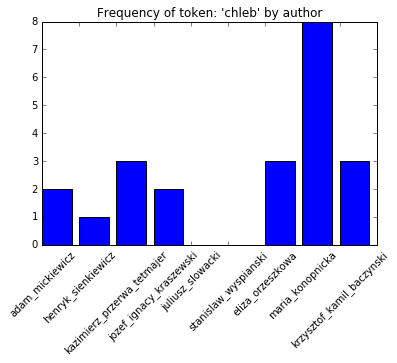

In [391]:
token = u"chleb"
authors, y = [], []
for idx, file_name in enumerate(raw_data.keys()):
    author = file_name.split('.')[0]
    authors.append(author)
    y.append(dtm[idx, vocab == token])
X = xrange(len(authors))

plt.bar(X, y)
plt.title("Frequency of token: \'{}\' by author".format(token))
plt.xticks(X, authors, rotation=45)
plt.show()

## Frequency of sample sentence's tokens per author

In [392]:
tokens = u"Ala ma kota a kot ma ale".lower().split()
data = []
for idx, file_name in enumerate(raw_data.keys()):
    author = file_name.split('.')[0]
    frequency = []
    for token in tokens:
        value = dtm[idx, vocab == token]
        if value:
            frequency.append(value[0])
        else:
            frequency.append(0)
    data.append([author]+frequency)

pd.DataFrame(data, columns=["author"]+tokens)

,author,ala,ma,kota,a,kot,ma,ale
0,adam_mickiewicz,0,27,0,0,0,27,59
1,henryk_sienkiewicz,0,24,0,0,0,24,155
2,kazimierz_przerwa_tetmajer,0,30,0,0,0,30,29
3,jozef_ignacy_kraszewski,0,26,0,0,0,26,90
4,juliusz_slowacki,0,21,0,0,0,21,52
5,stanislaw_wyspianski,0,53,0,0,0,53,40
6,eliza_orzeszkowa,0,18,0,0,0,18,105
7,maria_konopnicka,0,37,0,0,1,37,83
8,krzysztof_kamil_baczynski,0,17,1,0,1,17,24


## Compute Euclidean distance (by hand)

In [393]:
n, _ = dtm.shape
dist = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        x, y = dtm[i, :], dtm[j, :]
        dist[i, j] = np.sqrt(np.sum((x - y)**2))
pd.DataFrame(dist, columns=authors, index=authors).round(2)

,adam_mickiewicz,henryk_sienkiewicz,kazimierz_przerwa_tetmajer,jozef_ignacy_kraszewski,juliusz_slowacki,stanislaw_wyspianski,eliza_orzeszkowa,maria_konopnicka,krzysztof_kamil_baczynski
adam_mickiewicz,0.00,386.08,410.30,478.92,311.29,449.23,294.43,371.26,514.96
henryk_sienkiewicz,386.08,0.00,493.47,329.01,410.94,464.85,324.96,327.36,624.17
kazimierz_przerwa_tetmajer,410.30,493.47,0.00,535.92,378.01,445.90,405.58,449.51,487.56
jozef_ignacy_kraszewski,478.92,329.01,535.92,0.00,516.05,516.41,399.36,367.49,694.55
juliusz_slowacki,311.29,410.94,378.01,516.05,0.00,437.13,338.48,393.70,467.22
stanislaw_wyspianski,449.23,464.85,445.90,516.41,437.13,0.00,400.07,444.94,608.21
eliza_orzeszkowa,294.43,324.96,405.58,399.36,338.48,400.07,0.00,286.29,519.28
maria_konopnicka,371.26,327.36,449.51,367.49,393.70,444.94,286.29,0.00,576.05
krzysztof_kamil_baczynski,514.96,624.17,487.56,694.55,467.22,608.21,519.28,576.05,0.00


## Compute Euclidean distance (using sklearn)

In [394]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm)
pd.DataFrame(dist, columns=authors, index=authors).round(2)

,adam_mickiewicz,henryk_sienkiewicz,kazimierz_przerwa_tetmajer,jozef_ignacy_kraszewski,juliusz_slowacki,stanislaw_wyspianski,eliza_orzeszkowa,maria_konopnicka,krzysztof_kamil_baczynski
adam_mickiewicz,0.00,386.08,410.30,478.92,311.29,449.23,294.43,371.26,514.96
henryk_sienkiewicz,386.08,0.00,493.47,329.01,410.94,464.85,324.96,327.36,624.17
kazimierz_przerwa_tetmajer,410.30,493.47,0.00,535.92,378.01,445.90,405.58,449.51,487.56
jozef_ignacy_kraszewski,478.92,329.01,535.92,0.00,516.05,516.41,399.36,367.49,694.55
juliusz_slowacki,311.29,410.94,378.01,516.05,0.00,437.13,338.48,393.70,467.22
stanislaw_wyspianski,449.23,464.85,445.90,516.41,437.13,0.00,400.07,444.94,608.21
eliza_orzeszkowa,294.43,324.96,405.58,399.36,338.48,400.07,0.00,286.29,519.28
maria_konopnicka,371.26,327.36,449.51,367.49,393.70,444.94,286.29,0.00,576.05
krzysztof_kamil_baczynski,514.96,624.17,487.56,694.55,467.22,608.21,519.28,576.05,0.00


## Compute cosine similarity

In [395]:
from sklearn.metrics.pairwise import cosine_similarity
dist = cosine_similarity(dtm)
pd.DataFrame(dist, columns=authors, index=authors).round(2)

,adam_mickiewicz,henryk_sienkiewicz,kazimierz_przerwa_tetmajer,jozef_ignacy_kraszewski,juliusz_slowacki,stanislaw_wyspianski,eliza_orzeszkowa,maria_konopnicka,krzysztof_kamil_baczynski
adam_mickiewicz,1.00,0.93,0.86,0.90,0.92,0.85,0.93,0.92,0.80
henryk_sienkiewicz,0.93,1.00,0.86,0.95,0.91,0.88,0.95,0.94,0.77
kazimierz_przerwa_tetmajer,0.86,0.86,1.00,0.86,0.89,0.85,0.87,0.88,0.82
jozef_ignacy_kraszewski,0.90,0.95,0.86,1.00,0.87,0.87,0.94,0.94,0.75
juliusz_slowacki,0.92,0.91,0.89,0.87,1.00,0.86,0.91,0.91,0.84
stanislaw_wyspianski,0.85,0.88,0.85,0.87,0.86,1.00,0.88,0.88,0.74
eliza_orzeszkowa,0.93,0.95,0.87,0.94,0.91,0.88,1.00,0.96,0.80
maria_konopnicka,0.92,0.94,0.88,0.94,0.91,0.88,0.96,1.00,0.79
krzysztof_kamil_baczynski,0.80,0.77,0.82,0.75,0.84,0.74,0.80,0.79,1.00


## Visualize distances

In [396]:
from sklearn.manifold import MDS

In [397]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

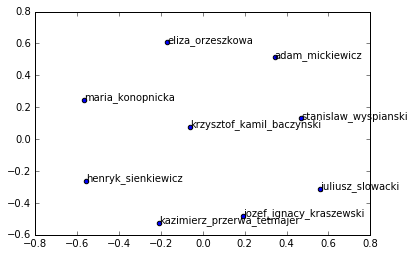

In [398]:
xs, ys = pos[:, 0], pos[:, 1]
for x, y, name in zip(xs, ys, authors):
    plt.scatter(x, y)
    plt.text(x, y, name)
plt.show()

In [399]:
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

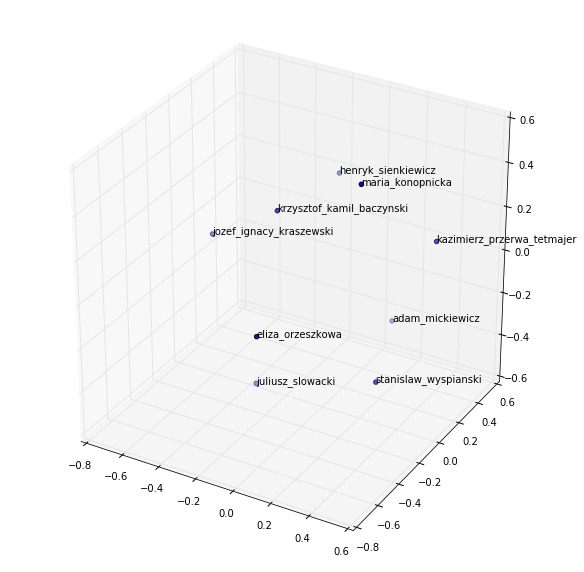

In [400]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], authors):
    ax.text(x, y, z, s)
plt.show()

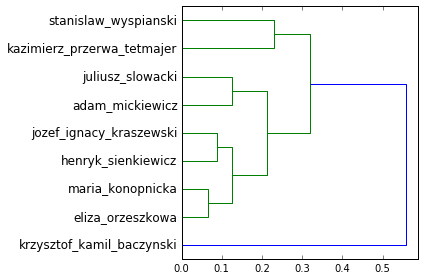

In [401]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)
dendrogram(linkage_matrix, orientation="right", labels=authors)
plt.tight_layout()  # fixes margins
plt.show()

## Analyse topics

### Remove stop words from corpus

In [481]:
stop_words = [u'mną', u'miała', u'wśród', 'wy', 'tem', 'nam', 'we', u'mógł', u'jéj', 'potem', 'znowu', 'bardzo', u'których', u'przecież', 'niech', u'choć', u'której', 'we', 'ach', u'cóż', 'niech', u'będzie', u'coś', 'poza', u'jeżeli', u'jeśli', u'też', 'nich', 'im', u'są', 'jam', 'tych', 'raz', 'niej', u'która', 'jakby', 'ona', 'wtedy', 'jakby', 'oto', 'albo', u'są', 'der', 'die', 'und', 'nas', 'sie', 'du', 'was', 'den', 'in', u'aż', 'je', u'cię', 'ta', 'siebie', u'może', 'tym', 'nic', u'być', 'niego', 'ci', u'miał', 'bez', u'zaś', 'te', u'mój', u'była', 'aby', 'by', u'iż', 'ani', 'będzie', u'więc', 'przy', 'swej', u'które', 'ich', 'jeszcze', 'tego', 'sobie', 'przez', 'ku', 'być', 'też', 'które', 'sam', 'nawet', 'nad', 'tam', 'pod', 'tej', 'ma', u'nią', u'teraz', u'ją', u'który', u'kto', u'gdzie', u'kiedy', 'ze', 'on', 'nim', 'czy', 'ten', 'przed', u'tylko', u'jego', u'gdy', u'był', u'j', u'co', u'mi', u'ale', u'za', u'już', u'jest', u'go', u'ty', u'pod', u'tak', u'się', u'dla', u'quot', u'na', u'tu', u'to', u'lub', u'było', u'jak', u'jej', u'po', u'pan', u'że', u'do', u'jako', u'bo', u'nie', u'mnie', u'ja', u'a', u'c', u'b', u'e', u'd', u'i', u'h', u'k', u'od', u'm', u'l', u'o', u'mu', u'p', u's', u'r', 'lecz', u'w', u'v', u'x', u'the', u'z']

In [482]:
vectorizer = CountVectorizer(stop_words=stop_words)
dtm = vectorizer.fit_transform(raw_data.values()).toarray() 
vocab = np.array(vectorizer.get_feature_names())

### Create topics using NMF

In [483]:
from sklearn import decomposition
num_topics = 6
num_top_words = 20
clf = decomposition.NMF(n_components=num_topics, random_state=1)

In [484]:
doctopic = clf.fit_transform(dtm)

In [485]:
topic_words = []
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [486]:
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

In [487]:
doctopic_orig = doctopic.copy()
authors_names = np.asarray(authors)
num_groups = len(set(authors_names))

doctopic_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(authors_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[authors_names == name, :], axis=0)
doctopic = doctopic_grouped

## Most popular tokens in each topic

In [488]:
data = []
for t in range(len(topic_words)):
     data.append([u"Topic {}".format(t)] + topic_words[t][:10])
pd.DataFrame(data, columns=["Topic"]+["Top {}".format(x+1) for x in xrange(10)])

,Topic,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
0,Topic 0,rzekł,jednak,pani,oczy,pana,wszystko,dobrze,ziemi,ludzi,chwili
1,Topic 1,judasz,jakób,oczy,nieznany,ziemi,wszystko,krew,świat,serce,duszy
2,Topic 2,ziemi,niebo,noc,ziemia,oczy,czas,nieba,drzewa,ziemię,ptaki
3,Topic 3,życia,życie,konrad,myśli,myśl,duszy,poeta,właśnie,wszystko,maska
4,Topic 4,król,panie,ciebie,oczy,ludzi,moje,balladyna,serce,boga,maria
5,Topic 5,kaśka,pani,wszystko,oczy,kaśki,ręce,jan,wie,nigdy,chwilę


## Topics in authors work

In [489]:
pd.DataFrame(doctopic, index=authors, columns=["Topic {}".format(x) for x in xrange(num_topics)]).round(2)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
adam_mickiewicz,0.68,0.02,0.11,0.00,0.18,0.00
henryk_sienkiewicz,0.47,0.03,0.03,0.08,0.00,0.39
kazimierz_przerwa_tetmajer,1.00,0.00,0.00,0.00,0.00,0.00
jozef_ignacy_kraszewski,0.84,0.00,0.00,0.02,0.11,0.04
juliusz_slowacki,0.00,0.00,0.00,0.00,1.00,0.00
stanislaw_wyspianski,0.00,1.00,0.00,0.00,0.00,0.00
eliza_orzeszkowa,0.00,0.00,1.00,0.00,0.00,0.00
maria_konopnicka,0.00,0.00,0.00,0.00,0.00,1.00
krzysztof_kamil_baczynski,0.00,0.00,0.00,1.00,0.00,0.00


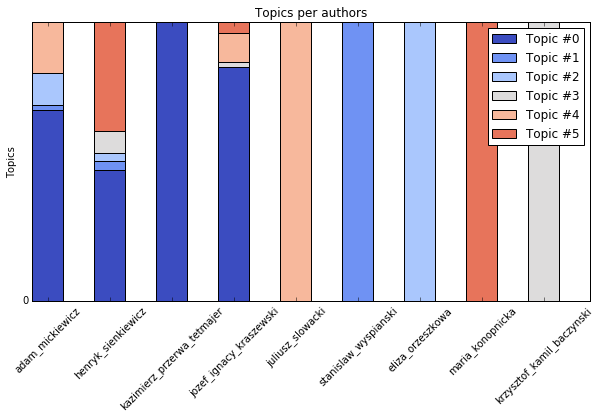

In [490]:
N, K = doctopic.shape  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

fig = plt.figure(figsize=(10, 5))

for k in range(K):
    color = plt.cm.coolwarm(k/float(K), 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)


plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1

plt.ylabel('Topics')

plt.title('Topics per authors')

plt.xticks(ind+width/2, authors, rotation='45')
plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels)
plt.show()

## Topic visualization heatmap

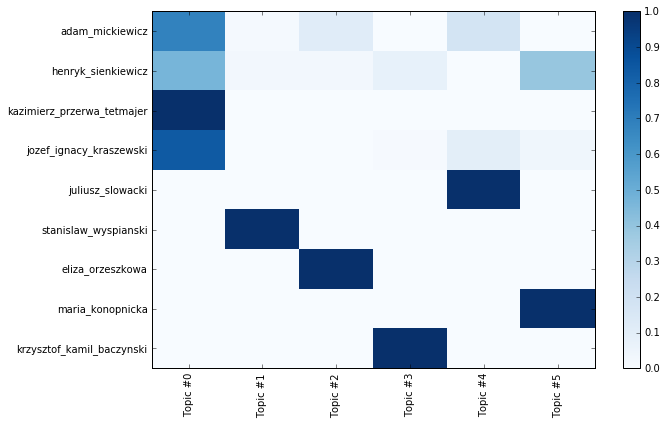

In [491]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(doctopic, norm=None, cmap='Blues')
plt.yticks(np.arange(doctopic.shape[0])+0.5, authors);
plt.xticks(np.arange(doctopic.shape[1])+0.5, topic_labels);
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()